In [1]:
# import required librares for dataframe and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
%matplotlib inline
from matplotlib.dates import DateFormatter
import seaborn as sns
import statsmodels.api as sts
import datetime

In [2]:
#reading the data 

dataframe = pd.read_csv(r"C:\Users\LENOVO\Desktop\springboard\[Nidhi Kakar] Capstone Project 2\OnlineRetail.csv", encoding='cp1252')

In [3]:
dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Data Cleansing

In [4]:
# Finding type of data 

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
dataframe.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# we see that Customer Id column has missing values, 
# Quantity column has negative values and so does UnitPrice column.
# we need to drop all these rows before moving to analysis as Quantity and Unit Price cannot be negative.

In [7]:
# calculating percentage of missing values of the dataframe

(dataframe.isnull().sum()/len(dataframe))*100

# 25% of customer ID data is missing, so we remove these from our dataframe.

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [8]:
dataframe[dataframe['Quantity']<0]



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [9]:
print(dataframe[dataframe['CustomerID']==15498])

       InvoiceNo StockCode                        Description  Quantity  \
14498    C537597         D                           Discount        -1   
17612     537771     21232     STRAWBERRY CERAMIC TRINKET BOX        24   
17613     537771     22174                         PHOTO CUBE        48   
17614     537771     21524     DOORMAT SPOTTY HOME SWEET HOME        20   
17615     537771    48173C               DOORMAT BLACK FLOCK         10   
...          ...       ...                                ...       ...   
534042    581129     82484  WOOD BLACK BOARD ANT WHITE FINISH         2   
534043    581129     22457    NATURAL SLATE HEART CHALKBOARD          6   
534044    581129     84879      ASSORTED COLOUR BIRD ORNAMENT         8   
534045    581129     20963                  APPLE BATH SPONGE        20   
541541   C581499         M                             Manual        -1   

             InvoiceDate  UnitPrice  CustomerID         Country  
14498   07-12-2010 12:34     281.

In [10]:
dataframe[dataframe['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom


In [11]:
# new dataframe after removing negative value of quantity and unitprice

dataframe_1 = dataframe[(dataframe['UnitPrice']>0) & (dataframe['Quantity']>0)]
dataframe_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


In [12]:
# dropping rows having missing values

dataframe_1 = dataframe_1.dropna()
dataframe_1.shape
dataframe_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [13]:
# Changing type of Customer Id to string

dataframe_1['CustomerID']= dataframe_1['CustomerID'].astype(str)

In [14]:
dataframe_1.nunique(axis=0, dropna=True)

InvoiceNo      18532
StockCode       3665
Description     3877
Quantity         301
InvoiceDate    17282
UnitPrice        440
CustomerID      4338
Country           37
dtype: int64

# RFM Modeling Technique #

### Here we will calculate the Recency, Frequency and Monetary for the customers and those are defined as ; ###

### Recency : How much time has elapsed since a customer's last activity or transaction with the brand? ###
### Frequency : How often has a customer transacted or interacted with the brand during a particular period of time? ###
### Monetary : How much a customer has spent with the brand during a particular period of time ###


In [15]:
dataframe_1['InvoiceDate'] = pd.to_datetime(dataframe_1['InvoiceDate'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )

In [16]:
# 
dataframe_1['Spend'] = dataframe_1['Quantity'] * dataframe_1['UnitPrice']
dataframe_1.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom,54.08


In [17]:
dataframe_1.describe()

,Quantity,UnitPrice,Spend
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,22.397000
std,179.331775,22.097877,309.071041
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.680000
50%,6.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


In [18]:
from datetime import timedelta

snapshot_date = max(dataframe_1.InvoiceDate) + datetime.timedelta(days=1)


In [19]:

# Aggregate data on a customer level
datamart = dataframe_1.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
'InvoiceNo': 'count','Spend': 'sum'})

# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','Spend': 'MonetaryValue'}, inplace=True)

# Check the first rows
datamart.head(10)


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,327,1,77183.60
12347.0,41,182,4310.00
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40
12352.0,74,85,2506.04
12353.0,205,4,89.00
12354.0,234,58,1079.40
12355.0,97,13,459.40


In [20]:
datamart.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4338.00,4338.00,4338.00
mean,106.47,91.72,2054.27
std,115.08,228.79,8989.23
min,1.00,1.00,3.75
25%,23.00,17.00,307.41
50%,62.00,41.00,674.48
75%,162.75,100.00,1661.74
max,698.00,7847.00,280206.02


In [21]:
mart_rfm = datamart[:]

In [22]:
mart_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,327,1,77183.60
12347.0,41,182,4310.00
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40



### Building RFM Segments ###


#### We calculate Quartile Value for each column and name them R F M ####

In [23]:

r_labels= range(4,0,-1) # As the most recent customer is better so the label is reversed

recency_quartiles = pd.qcut(datamart['Recency'], q=4, labels = r_labels) # Divide into groups based on quartiles

datamart['R'] = recency_quartiles # Create a new column

datamart = datamart.assign(R = recency_quartiles.values)


In [24]:

# Calculating Frequency and monetary quartiles

f_labels = range(1,5)
m_labels = range(1,5)

frequency_quartiles = pd.qcut(datamart['Frequency'], q=4, labels = f_labels)
monetary_quartiles = pd.qcut(datamart['MonetaryValue'], q=4, labels = m_labels)

datamart = datamart.assign(F = frequency_quartiles.values, M = monetary_quartiles.values)

datamart.head(20)


,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,327,1,77183.60,1,1,4
12347.0,41,182,4310.00,3,4,4
12348.0,77,31,1797.24,2,2,4
12349.0,20,73,1757.55,4,3,4
12350.0,312,17,334.40,1,1,2
12352.0,74,85,2506.04,2,3,4
12353.0,205,4,89.00,1,1,1
12354.0,234,58,1079.40,1,3,3
12355.0,97,13,459.40,2,1,2


#### Build RFM Segment and RFM Score ####

In [25]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M']) # define function to concatenate RFM values

datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)

datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)


In [26]:
print(datamart)

            Recency  Frequency  MonetaryValue  R  F  M RFM_Segment  RFM_Score
CustomerID                                                                   
12346.0         327          1       77183.60  1  1  4         114        6.0
12347.0          41        182        4310.00  3  4  4         344       11.0
12348.0          77         31        1797.24  2  2  4         224        8.0
12349.0          20         73        1757.55  4  3  4         434       11.0
12350.0         312         17         334.40  1  1  2         112        4.0
...             ...        ...            ... .. .. ..         ...        ...
18280.0         161         10         180.60  2  1  1         211        4.0
18281.0           5          7          80.82  4  1  1         411        6.0
18282.0         217         12         178.05  1  1  1         111        3.0
18283.0          11        756        2094.88  4  4  4         444       12.0
18287.0           1         70        1837.28  4  3  4         4

### Analyzing RFM Segment ###

In [27]:

datamart.groupby('RFM_Segment').size().sort_values(ascending=False) # Exploring Largest RFM Segment


RFM_Segment
444    401
111    369
344    248
122    204
211    180
      ... 
142      8
314      6
124      5
414      4
441      3
Length: 61, dtype: int64

In [28]:
datamart[datamart['RFM_Segment']=='111'][:10] # Exploring lowest RFM Segment(111) and view top 10 rows

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12353.0,205,4,89.00,1,1,1,111,3.0
12361.0,289,10,189.90,1,1,1,111,3.0
12367.0,213,11,168.90,1,1,1,111,3.0
12402.0,325,11,225.60,1,1,1,111,3.0
12441.0,486,11,173.55,1,1,1,111,3.0
12442.0,182,12,172.06,1,1,1,111,3.0
12450.0,175,8,197.88,1,1,1,111,3.0
12509.0,286,7,176.50,1,1,1,111,3.0
12547.0,199,8,207.80,1,1,1,111,3.0


### Analyzing RFM Score ###

In [29]:
# summary metrics per RFM Score
datamart.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean','count'] }).round(1)


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         288.4       8.0         157.2   369
4.0         199.1      14.2         231.7   372
5.0         169.5      21.4         361.8   533
6.0         118.6      28.5         652.9   490
7.0          97.8      39.6        1246.5   423
8.0          70.2      55.2        1044.6   460
9.0          59.1      79.8        1480.6   422
10.0         41.8     123.0        1987.1   439
11.0         26.7     189.4        4592.1   429
12.0         11.2     382.1        9425.3   401

### Creating Custom segments ###

In [30]:
# Use RFM Score to define customers in to Top, Middle and Low segments

def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10)):
        return 'Middle'
    else:
        return 'Low'


In [31]:
# Create a new variable RFM_Level
datamart['RFM Level'] = datamart.apply(rfm_level, axis=1)


In [32]:
print(datamart.head())

            Recency  Frequency  MonetaryValue  R  F  M RFM_Segment  RFM_Score  \
CustomerID                                                                      
12346.0         327          1       77183.60  1  1  4         114        6.0   
12347.0          41        182        4310.00  3  4  4         344       11.0   
12348.0          77         31        1797.24  2  2  4         224        8.0   
12349.0          20         73        1757.55  4  3  4         434       11.0   
12350.0         312         17         334.40  1  1  2         112        4.0   

           RFM Level  
CustomerID            
12346.0       Middle  
12347.0          Top  
12348.0       Middle  
12349.0          Top  
12350.0          Low  


In [33]:

# Calculate average values for each RFM_Level, and return a size of each segment

datamart.groupby('RFM Level').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean','count'] }).round(1)


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM Level                                      
Low         212.6      15.4         264.6  1274
Middle       87.3      50.0        1087.7  1795
Top          27.0     227.3        5218.2  1269

In [34]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM Level
CustomerID,,,,,,,,,
12346.0,327,1,77183.60,1,1,4,114,6.0,Middle
12347.0,41,182,4310.00,3,4,4,344,11.0,Top
12348.0,77,31,1797.24,2,2,4,224,8.0,Middle
12349.0,20,73,1757.55,4,3,4,434,11.0,Top
12350.0,312,17,334.40,1,1,2,112,4.0,Low


In [35]:
mart_rfm = datamart.iloc[:,0:3]

In [36]:
mart_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,327,1,77183.60
12347.0,41,182,4310.00
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40


In [37]:
mart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,106.470954,91.720609,2054.266460
std,115.082161,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,23.000000,17.000000,307.415000
50%,62.000000,41.000000,674.485000
75%,162.750000,100.000000,1661.740000
max,698.000000,7847.000000,280206.020000


### Here we see that Recency Frequency and Monetary Value do not have same mean and std.###
### Hence we need to scale the variables for clustering ###

## Data Preprocessing for Kmeans clustering ##


In [38]:
log_rfm = np.log(mart_rfm)

In [39]:
log_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.789960,0.000000,11.253942
12347.0,3.713572,5.204007,8.368693
12348.0,4.343805,3.433987,7.494007
12349.0,2.995732,4.290459,7.471676
12350.0,5.743003,2.833213,5.812338


### Exploring distribution of Recency ###

<function matplotlib.pyplot.show(*args, **kw)>

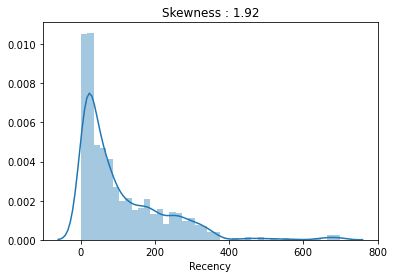

In [40]:
import seaborn as sns
sns.distplot(datamart['Recency'])
plt.title('Skewness ' + ': ' + round(datamart['Recency'].skew(),2).astype(str))
plt.show

### Exploring Distribution of Frequency


<function matplotlib.pyplot.show(*args, **kw)>

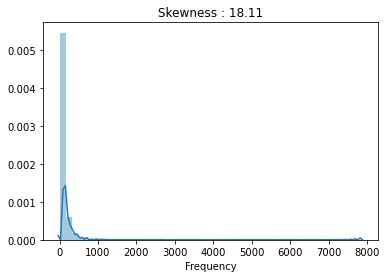

In [41]:
sns.distplot(datamart['Frequency'])
plt.title('Skewness ' + ': ' + round(datamart['Frequency'].skew(),2).astype(str))
plt.show

### Exploring Distribution of Monetary Value ###

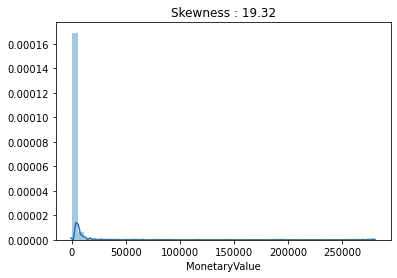

In [42]:
sns.distplot(datamart['MonetaryValue'])
plt.title('Skewness ' + ': ' + round(datamart['MonetaryValue'].skew(),2).astype(str))
plt.show()

### All three variables are right tail skewed as seen from above ###

### Removing Skewness from the data ###

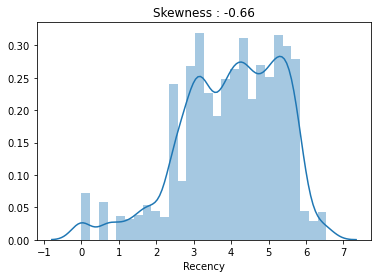

In [43]:

sns.distplot(log_rfm['Recency'])
plt.title('Skewness ' + ': ' + round(log_rfm['Recency'].skew(),2).astype(str))
plt.show()

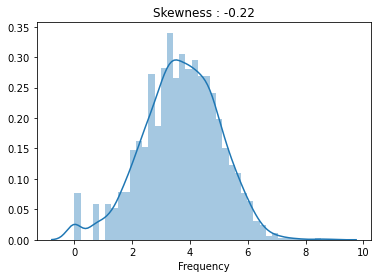

In [44]:
sns.distplot(log_rfm['Frequency'])
plt.title('Skewness ' + ': ' + round(log_rfm['Frequency'].skew(),2).astype(str))
plt.show()

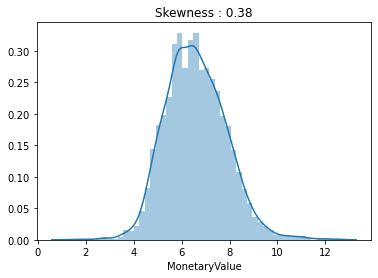

In [45]:
sns.distplot(log_rfm['MonetaryValue'])
plt.title('Skewness ' + ': ' + round(log_rfm['MonetaryValue'].skew(),2).astype(str))
plt.show()

### Standardizing and Scaling to Normalize the data ###

In [46]:
from sklearn.preprocessing import StandardScaler

# initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(log_rfm)

# scale and centre the data
rfm_normalized = scaler.transform(log_rfm) 


In [47]:
print('mean: ', rfm_normalized.mean(axis=0).round(2))
print('std: ', rfm_normalized.std(axis=0).round(2))


mean:  [ 0. -0.  0.]
std:  [1. 1. 1.]


In [48]:
# creating a pandas dataframe

rfm_normalized = pd.DataFrame(data=rfm_normalized, index=log_rfm.index, columns=log_rfm.columns)

In [49]:
rfm_normalized.describe()

,Recency,Frequency,MonetaryValue
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,2.352506e-16,3.672591e-18,-1.202102e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-3.001707e+00,-2.775160e+00,-4.179280e+00
25%,-6.476706e-01,-6.384332e-01,-6.841832e-01
50%,9.682346e-02,2.550746e-02,-6.094235e-02
75%,8.213750e-01,6.979246e-01,6.542440e-01
max,1.914502e+00,3.988157e+00,4.721395e+00


### We will use Elbow method for finding optimum no of clusters ###

In [50]:
from sklearn.cluster import KMeans

# fit KMeans and calculate SS_distance for each {k}

SS_distance = {}
for k in range(1,20):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(rfm_normalized)
    SS_distance[k] = mod.inertia_ # sum of squared distances to closest cluster centre

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

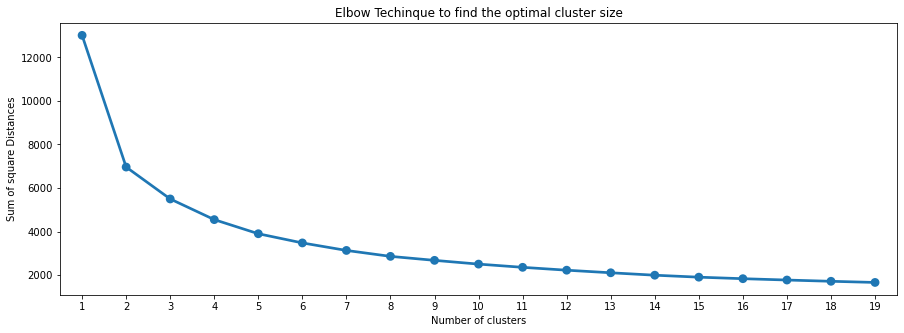

In [51]:
#Plotting the sum of square distance values and numbers of clusters

plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")

In [57]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
clusters_range = [2,3,4,5,6,7,8]

for no_of_clusters in clusters_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=no_of_clusters, max_iter=1000)
    kmeans.fit(rfm_normalized)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    score = silhouette_score(rfm_normalized, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(no_of_clusters, score))

For n_clusters=2, the silhouette score is 0.3947083072059434
For n_clusters=3, the silhouette score is 0.29057731759393124
For n_clusters=4, the silhouette score is 0.29675439563937894
For n_clusters=5, the silhouette score is 0.2736200368639288
For n_clusters=6, the silhouette score is 0.28258493282306446
For n_clusters=7, the silhouette score is 0.2679503510185217
For n_clusters=8, the silhouette score is 0.2660992277345101


In [58]:
# Now we will perform K- means clustering on the data set with k=3 as final model

KM_clust = KMeans(n_clusters= 3, init = 'k-means++',max_iter = 1000)
KM_clust.fit(rfm_normalized)

KMeans(max_iter=1000, n_clusters=3)

In [59]:
# Mapping on the data

datamart['Cluster'] = KM_clust.labels_
datamart['Cluster'] = 'Cluster' + datamart['Cluster'].astype(str)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM Level,Cluster
CustomerID,,,,,,,,,,
12346.0,327,1,77183.60,1,1,4,114,6.0,Middle,Cluster2
12347.0,41,182,4310.00,3,4,4,344,11.0,Top,Cluster1
12348.0,77,31,1797.24,2,2,4,224,8.0,Middle,Cluster2
12349.0,20,73,1757.55,4,3,4,434,11.0,Top,Cluster1
12350.0,312,17,334.40,1,1,2,112,4.0,Low,Cluster0


## Clusters have been created based on the values of Recency, Frequency and Monetary with the help of K-Means Clustering. ##

In [60]:
# Calculate average values for each Cluster, and return a size of each segment

datamart.groupby('Cluster').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean','count'] }).round(1)

Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster                                       
Cluster0   192.6      15.1         291.9  1498
Cluster1    20.3     252.8        6302.5  1025
Cluster2    84.0      64.0        1109.7  1815

### On taking 4 Clusters, we see that Cluster 1 and Cluster 3 have almost same no of customers ###

####                 Recency      Frequency   	MonetaryValue
#### Cluster      mean             mean          mean   count
#### 				
#### Cluster0	140.2	            65.3        	1191.1	1310
#### Cluster1	  20.0	             50.5	           787.0    857
#### Cluster2	188.1	            12.6	          265.1	 1274
#### Cluster3	  24.0	           282.0	        7066.7	  897



#### and same recency but frequency and monetary have huge difference. ###
#### Cluster 1 does not help ABC to be identified as target customers, though we can consider Cluster 3 ###
#### as is it bringing in maximum revenue out of all the 4 clusters.####
#### Hence we can go back to dividing customers into 3 clusters with distinguished traits in all. ###

In [61]:
rfm_normalized['RFM Level'] = datamart['RFM Level']
rfm_normalized['Cluster'] = datamart['Cluster']


In [62]:
datamart_melt = pd.melt(rfm_normalized.reset_index(),id_vars=['CustomerID','RFM Level','Cluster'],value_vars=['Recency','Frequency',
'MonetaryValue'],var_name='Attribute',value_name='Value')

In [63]:
datamart_melt.head()

,CustomerID,RFM Level,Cluster,Attribute,Value
0,12346.0,Middle,Cluster2,Recency,1.345224
1,12347.0,Top,Cluster1,Recency,-0.213667
2,12348.0,Middle,Cluster2,Recency,0.259494
3,12349.0,Top,Cluster1,Recency,-0.752600
4,12350.0,Low,Cluster0,Recency,1.309970


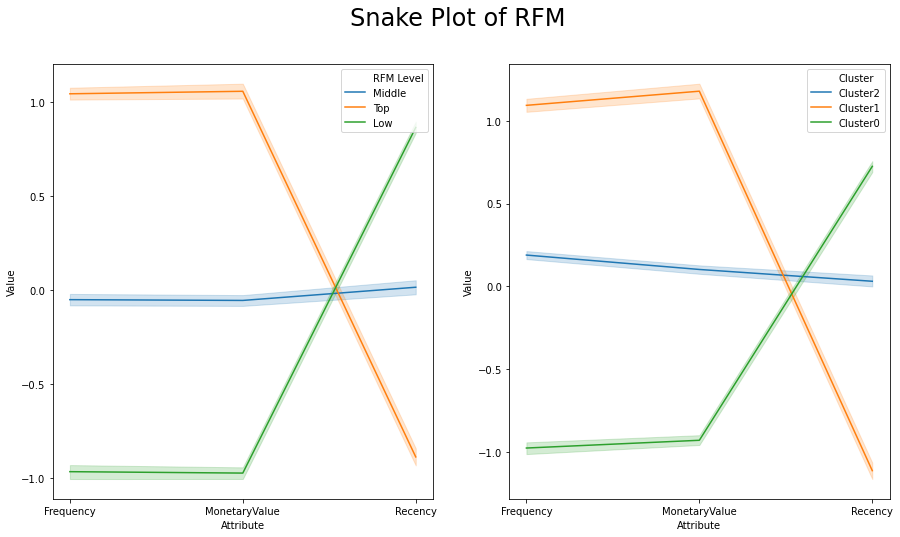

In [64]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Attribute', y = 'Value', hue = 'RFM Level', data = datamart_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Attribute', y = 'Value', hue = 'Cluster', data = datamart_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

## Inference:##


### Customers with Cluster Id 1 are the customers with high amount of transactions and high number of transactions as compared to other customers.###
### Customers with Cluster Id 0 are not recent buyers and with low monetry benefits to the store hence least of importance from business point of view. ###
### Customers with Cluster Id 2 are in-between the above 2 clusters. They are neither high on frequency nor monetary contribution to the store but should be targeted. ###
### Hence steps can be taken to  encourage them to reach Cluster Id 1 with proper marketing campaign and discounts offerings. ###

In [58]:
newdata=dataframe_1.groupby('CustomerID').sum()

In [59]:
newdata

,Quantity,UnitPrice,Spend
CustomerID,,,
12346.0,74215,1.04,77183.60
12347.0,2458,481.21,4310.00
12348.0,2341,178.71,1797.24
12349.0,631,605.10,1757.55
12350.0,197,65.30,334.40
...,...,...,...
18280.0,45,47.65,180.60
18281.0,54,39.36,80.82
18282.0,103,62.39,178.05


In [60]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM Level,Cluster
CustomerID,,,,,,,,,,
12346.0,327,1,77183.60,1,1,4,114,6.0,Middle,Cluster1
12347.0,41,182,4310.00,3,4,4,344,11.0,Top,Cluster0
12348.0,77,31,1797.24,2,2,4,224,8.0,Middle,Cluster1
12349.0,20,73,1757.55,4,3,4,434,11.0,Top,Cluster0
12350.0,312,17,334.40,1,1,2,112,4.0,Low,Cluster2
...,...,...,...,...,...,...,...,...,...,...
18280.0,161,10,180.60,2,1,1,211,4.0,Low,Cluster2
18281.0,5,7,80.82,4,1,1,411,6.0,Middle,Cluster2
18282.0,217,12,178.05,1,1,1,111,3.0,Low,Cluster2


In [61]:
final = pd.merge(newdata, datamart, on='CustomerID')

In [67]:
print(final)

            Quantity  UnitPrice     Spend  Recency  Frequency  MonetaryValue  \
CustomerID                                                                     
12346.0        74215       1.04  77183.60      327          1       77183.60   
12347.0         2458     481.21   4310.00       41        182        4310.00   
12348.0         2341     178.71   1797.24       77         31        1797.24   
12349.0          631     605.10   1757.55       20         73        1757.55   
12350.0          197      65.30    334.40      312         17         334.40   
...              ...        ...       ...      ...        ...            ...   
18280.0           45      47.65    180.60      161         10         180.60   
18281.0           54      39.36     80.82        5          7          80.82   
18282.0          103      62.39    178.05      217         12         178.05   
18283.0         1397    1220.93   2094.88       11        756        2094.88   
18287.0         1586     104.55   1837.2

#### when we comapre RFM level with Cluster we see that RFM score of 6.0 belongs to RFM level-Middle , however ####
#### it comes under cluster 1 for one CID and cluster 2 for another CID. 

In [68]:
plot_final=final.groupby('RFM Level').sum()

In [69]:
plot_final.drop('Spend',axis=1,inplace=True)

In [71]:
plot_final.drop('RFM_Score',axis=1,inplace=True)

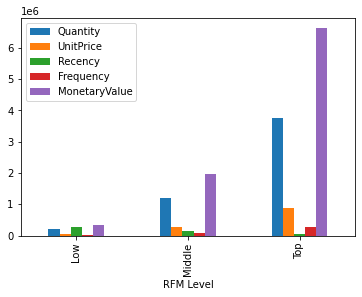

In [72]:
plot_final.plot.bar()
plt.show()

### Understanding Cutomers who shop frequently(Recency =1) with ABC ###

In [73]:
datamart_R = datamart[datamart['Recency']==1]

In [74]:
datamart_R.sort_values('MonetaryValue')

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM Level,Cluster
CustomerID,,,,,,,,,,
14642.0,1,2,96.12,4,1,1,411,6.0,Middle,Cluster2
18277.0,1,8,110.38,4,1,1,411,6.0,Middle,Cluster1
12602.0,1,12,153.12,4,1,1,411,6.0,Middle,Cluster1
17737.0,1,10,168.24,4,1,1,411,6.0,Middle,Cluster1
16753.0,1,34,223.92,4,2,1,421,7.0,Middle,Cluster0
...,...,...,...,...,...,...,...,...,...,...
13078.0,1,358,12627.94,4,4,4,444,12.0,Top,Cluster0
17841.0,1,7847,40991.57,4,4,4,444,12.0,Top,Cluster0
15311.0,1,2379,60767.90,4,4,4,444,12.0,Top,Cluster0


In [78]:
datamart_R.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,74.0,74.000000,74.000000,74.000000
mean,1.0,355.932432,7266.976892,10.405405
std,0.0,1139.112227,22445.046353,1.901109
min,1.0,2.000000,96.120000,6.000000
25%,1.0,38.000000,816.157500,9.250000
50%,1.0,97.000000,1841.295000,11.000000
75%,1.0,179.000000,3748.020000,12.000000
max,1.0,7847.000000,143825.060000,12.000000


### Understanding Customers with RFM Level LOW ###

In [79]:
final

,Quantity,UnitPrice,Spend,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM Level,Cluster
CustomerID,,,,,,,,,,,,,
12346.0,74215,1.04,77183.60,327,1,77183.60,1,1,4,114,6.0,Middle,Cluster1
12347.0,2458,481.21,4310.00,41,182,4310.00,3,4,4,344,11.0,Top,Cluster0
12348.0,2341,178.71,1797.24,77,31,1797.24,2,2,4,224,8.0,Middle,Cluster1
12349.0,631,605.10,1757.55,20,73,1757.55,4,3,4,434,11.0,Top,Cluster0
12350.0,197,65.30,334.40,312,17,334.40,1,1,2,112,4.0,Low,Cluster2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,45,47.65,180.60,161,10,180.60,2,1,1,211,4.0,Low,Cluster2
18281.0,54,39.36,80.82,5,7,80.82,4,1,1,411,6.0,Middle,Cluster2
18282.0,103,62.39,178.05,217,12,178.05,1,1,1,111,3.0,Low,Cluster2


In [80]:
final.sort_values('Recency',ascending=False)

,Quantity,UnitPrice,Spend,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM Level,Cluster
CustomerID,,,,,,,,,,,,,
17643.0,71,32.15,101.55,698,8,101.55,1,1,1,111,3.0,Low,Cluster2
13065.0,74,73.11,205.86,698,14,205.86,1,1,1,111,3.0,Low,Cluster2
13747.0,8,9.95,79.60,698,1,79.60,1,1,1,111,3.0,Low,Cluster2
17968.0,160,163.98,277.35,698,85,277.35,1,3,1,131,5.0,Low,Cluster2
16048.0,144,12.97,256.44,698,8,256.44,1,1,1,111,3.0,Low,Cluster2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16295.0,841,297.58,1328.55,1,79,1328.55,4,3,3,433,10.0,Top,Cluster0
16945.0,2725,555.10,4345.50,1,249,4345.50,4,4,4,444,12.0,Top,Cluster0
13704.0,1531,446.06,2308.06,1,134,2308.06,4,4,4,444,12.0,Top,Cluster0


In [81]:
final.groupby('RFM Level').sum()

,Quantity,UnitPrice,Spend,Recency,Frequency,MonetaryValue,RFM_Score
RFM Level,,,,,,,
Low,209988,65518.851,337047.111,270854,19663,337047.111,5260.0
Middle,1193844,281221.093,1952502.203,156710,89779,1952502.203,13379.0
Top,3763980,893260.670,6621858.590,34307,288442,6621858.590,13921.0


## Analyzing Low Segment Customers

In [82]:
final_low=final[final['RFM Level']=='Low']

In [83]:
final_low.sort_values('Recency',ascending=False)

,Quantity,UnitPrice,Spend,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM Level,Cluster
CustomerID,,,,,,,,,,,,,
13747.0,8,9.95,79.60,698,1,79.60,1,1,1,111,3.0,Low,Cluster2
17908.0,173,155.01,243.28,698,58,243.28,1,3,1,131,5.0,Low,Cluster2
14142.0,313,38.95,311.81,698,22,311.81,1,2,2,122,5.0,Low,Cluster2
17643.0,71,32.15,101.55,698,8,101.55,1,1,1,111,3.0,Low,Cluster2
16583.0,111,35.90,233.45,698,14,233.45,1,1,1,111,3.0,Low,Cluster2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15657.0,24,1.25,30.00,24,1,30.00,3,1,1,311,5.0,Low,Cluster2
15124.0,233,33.07,184.19,24,15,184.19,3,1,1,311,5.0,Low,Cluster2
13828.0,311,28.57,209.49,24,15,209.49,3,1,1,311,5.0,Low,Cluster2


In [84]:
final_low.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 12350.0 to 18282.0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Quantity       1274 non-null   int64   
 1   UnitPrice      1274 non-null   float64 
 2   Spend          1274 non-null   float64 
 3   Recency        1274 non-null   int64   
 4   Frequency      1274 non-null   int64   
 5   MonetaryValue  1274 non-null   float64 
 6   R              1274 non-null   category
 7   F              1274 non-null   category
 8   M              1274 non-null   category
 9   RFM_Segment    1274 non-null   object  
 10  RFM_Score      1274 non-null   float64 
 11  RFM Level      1274 non-null   object  
 12  Cluster        1274 non-null   object  
dtypes: category(3), float64(4), int64(3), object(3)
memory usage: 113.6+ KB


In [85]:
final_low = final_low[["Spend","Recency","Frequency"]]

In [86]:
final_low.sort_values('Spend',ascending=False)

,Spend,Recency,Frequency
CustomerID,,,
12818.0,1542.08,263,14
13791.0,1516.00,170,11
17553.0,1487.60,306,2
12770.0,1351.45,212,12
13328.0,1308.48,318,17
...,...,...,...
16878.0,13.30,85,3
17956.0,12.75,251,1
16454.0,6.90,46,2


In [91]:
# contribution to sales by low segment customers
(final_low['Spend'].sum()/dataframe_1['Spend'].sum())*100

3.7821982186306626

###  Low segment customers are contributing to only 4% of total sales but account for 
### 30% of total customers, so although they are lost customers, we cannot totally disregard them.



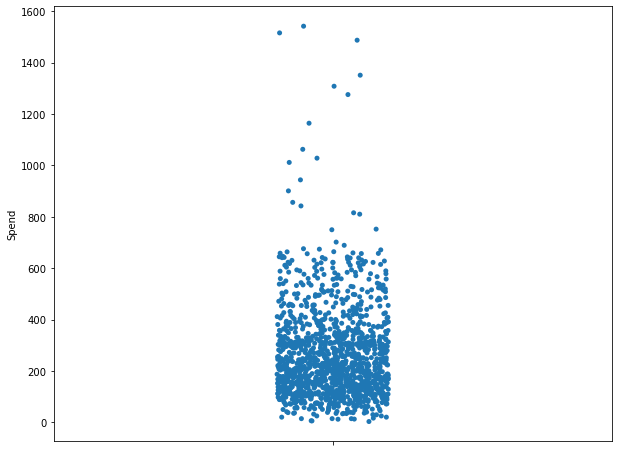

In [92]:
sns.stripplot(y='Spend', data=final_low)
plt.show()

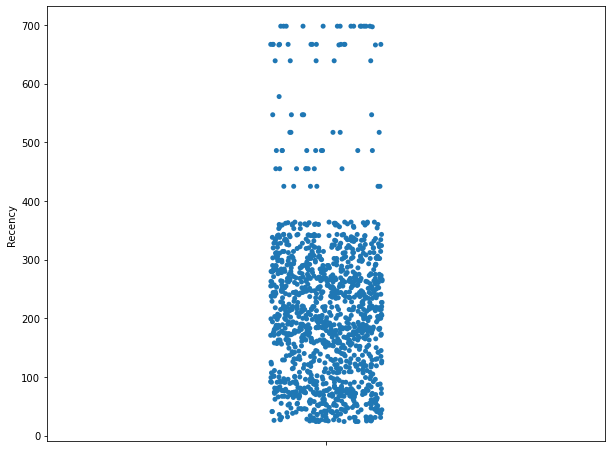

In [93]:
sns.stripplot(y='Recency',data=final_low)
plt.show()

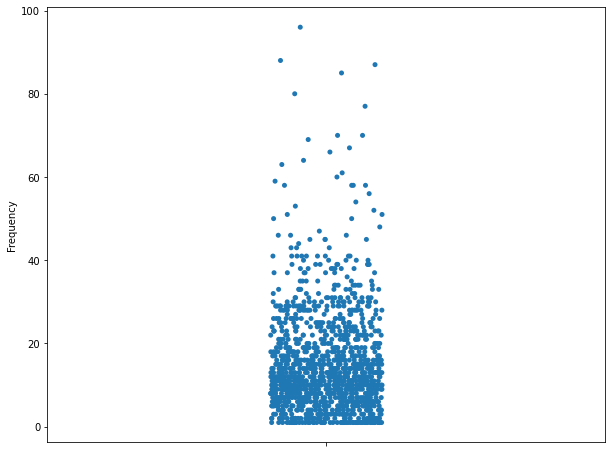

In [94]:
sns.stripplot(y='Frequency',data=final_low)
plt.show()

In [95]:
final_low.describe()

,Spend,Recency,Frequency
count,1274.000000,1274.000000,1274.000000
mean,264.558172,212.601256,15.434066
std,179.501445,129.561971,12.410400
min,3.750000,24.000000,1.000000
25%,141.522500,114.000000,7.000000
50%,221.230000,202.500000,12.000000
75%,332.555000,279.000000,21.000000
max,1542.080000,698.000000,96.000000


## Analyzing Middle Segment Customers

In [92]:
final_middle=final[final['RFM Level']=='Middle']

In [93]:
final_middle.describe()

,Quantity,UnitPrice,Spend,Recency,Frequency,MonetaryValue,RFM_Score
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,665.094150,156.669133,1087.744960,87.303621,50.016156,1087.744960,7.453482
std,2827.922808,143.505997,4678.114837,82.245281,39.673996,4678.114837,1.124587
min,1.000000,0.290000,35.400000,1.000000,1.000000,35.400000,6.000000
25%,221.000000,69.775000,411.650000,27.500000,25.000000,411.650000,6.000000
50%,365.000000,123.860000,673.260000,62.000000,40.000000,673.260000,7.000000
75%,627.500000,201.675000,1078.350000,121.500000,64.000000,1078.350000,8.000000
max,80997.000000,2033.100000,168472.500000,698.000000,378.000000,168472.500000,9.000000


In [95]:
# percentage contribution to sales

(final_middle['Spend'].sum()/dataframe_1['Spend'].sum())*100

21.910142864446755

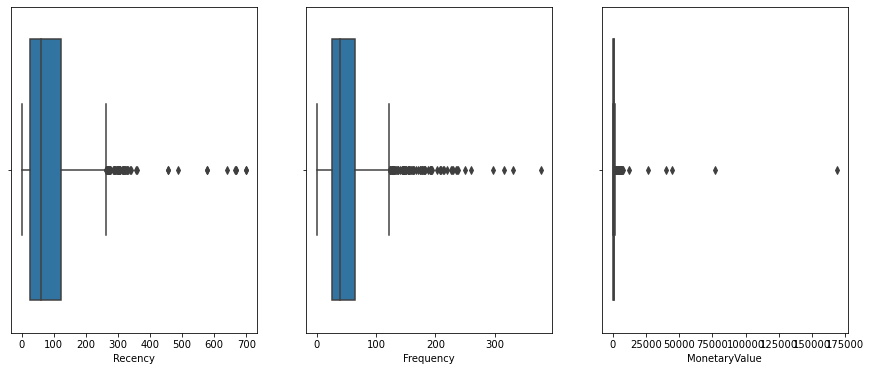

In [96]:
fig, axis = plt.subplots(1,3,figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(x='Recency',data=final_middle)
plt.subplot(1,3,2)
sns.boxplot(x='Frequency',data=final_middle)
plt.subplot(1,3,3)
sns.boxplot(x='MonetaryValue',data=final_middle)
plt.show()

In [97]:
Q1 = final_middle.quantile(0.25)
Q3 = final_middle.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity         406.5
UnitPrice        131.9
Spend            666.7
Recency           94.0
Frequency         39.0
MonetaryValue    666.7
RFM_Score          2.0
dtype: float64


#### We see from these boxplots that customers who are spending huge amounts are outliers here, which means that customers of middle segment should be encouraged to spend more.
#### Also, there are customers with recency period of more than 300 days to upto 700 days but they may be spending large money on this store or transacting  high no of times. They are on the verge of churning but have the potential to be converted into profitable customers.

In [98]:
final_middle[final_middle['Recency']>=300].sort_values('MonetaryValue',ascending=False)


,Quantity,UnitPrice,Spend,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM Level,Cluster
CustomerID,,,,,,,,,,,,,
12346.0,74215,1.04,77183.60,327,1,77183.60,1,1,4,114,6.0,Middle,Cluster1
17850.0,1733,1176.23,5391.21,667,297,5391.21,1,4,4,144,9.0,Middle,Cluster1
12378.0,2529,656.44,4008.62,306,219,4008.62,1,4,4,144,9.0,Middle,Cluster1
13868.0,1964,61.19,3192.54,302,33,3192.54,1,2,4,124,7.0,Middle,Cluster1
14439.0,526,207.39,2661.24,321,32,2661.24,1,2,4,124,7.0,Middle,Cluster1
16754.0,4280,1.24,2002.40,666,2,2002.40,1,1,4,114,6.0,Middle,Cluster2
12764.0,386,242.44,1693.88,318,45,1693.88,1,3,4,134,8.0,Middle,Cluster1
15332.0,652,99.44,1661.06,486,35,1661.06,1,2,3,123,6.0,Middle,Cluster1
12967.0,438,123.05,1660.90,359,19,1660.90,1,2,3,123,6.0,Middle,Cluster1


In [99]:
final_middle[final_middle['MonetaryValue']>=1100].sort_values('MonetaryValue',ascending=False)

,Quantity,UnitPrice,Spend,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM Level,Cluster
CustomerID,,,,,,,,,,,,,
16446.0,80997,4.98,168472.50,90,3,168472.50,2,1,4,214,7.0,Middle,Cluster0
12346.0,74215,1.04,77183.60,327,1,77183.60,1,1,4,114,6.0,Middle,Cluster1
15749.0,18028,30.44,44534.30,40,10,44534.30,3,1,4,314,8.0,Middle,Cluster0
15098.0,121,1303.95,39916.50,66,3,39916.50,2,1,4,214,7.0,Middle,Cluster1
16333.0,32184,47.98,26626.80,125,45,26626.80,2,3,4,234,9.0,Middle,Cluster0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16833.0,440,150.32,1106.53,101,47,1106.53,2,3,3,233,8.0,Middle,Cluster1
12857.0,343,190.55,1106.40,70,46,1106.40,2,3,3,233,8.0,Middle,Cluster1
14410.0,571,458.55,1105.07,124,193,1105.07,2,4,3,243,9.0,Middle,Cluster1


## Analyzing Top Segemnt Customers

In [100]:
final_top=final[final['RFM Level']=='Top']

In [101]:
# percentage contribution to sales

(final_top['Spend'].sum()/dataframe_1['Spend'].sum())*100

74.30765891692258

In [102]:
final_top.describe()

,Quantity,UnitPrice,Spend,Recency,Frequency,MonetaryValue,RFM_Score
count,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000
mean,2966.099291,703.909117,5218.170678,27.034673,227.298660,5218.170678,10.970055
std,8432.776334,1538.618031,15193.128896,26.904324,387.224893,15193.128896,0.813365
min,184.000000,30.060000,360.930000,1.000000,20.000000,360.930000,10.000000
25%,865.000000,265.340000,1546.910000,11.000000,99.000000,1546.910000,10.000000
50%,1436.000000,437.000000,2479.160000,19.000000,144.000000,2479.160000,11.000000
75%,2478.000000,740.490000,4199.850000,32.000000,252.000000,4199.850000,12.000000
max,196915.000000,33332.450000,280206.020000,161.000000,7847.000000,280206.020000,12.000000


In [103]:
Q1 = final_top.quantile(0.25)
Q3 = final_top.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity         1613.00
UnitPrice         475.15
Spend            2652.94
Recency            21.00
Frequency         153.00
MonetaryValue    2652.94
RFM_Score           2.00
dtype: float64


## INFERENCE

### Low segment customers are contributing to only 4% of total sales but account for 30% of total customers, so although they are lost customers, we cannot totally disregard them.

#### Effective marketing campaign to increase user engagement is necessary here. Personalised emails can be sent to reconnect with them. Also,they can be sent discount coupons based on their puchases to increase their monetary spend as well. 

### Middle segment customers are contributing to 22% of the total sales and account for 41% of the total customers. They should be converted to potential loyal customers.

#### Promotional campaigns,  can be sent to this segment to increase their loyalty. Based on their purchase history, they can be offered upselling and cross selling of products to increase the customer value. Also, Repeat products can be offered to them on discount.


### Top segment customers are the best customers of ABC. They are the loyal customers. this segment should be used by ABC to test new product launch as they are most likely to respond to campaigns.




